In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import doctest
from sklearn.metrics import accuracy_score,confusion_matrix
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mnist-in-csv/mnist_test.csv
/kaggle/input/mnist-in-csv/mnist_train.csv


In [2]:
df_train=pd.read_csv("/kaggle/input/mnist-in-csv/mnist_train.csv")
df_test=pd.read_csv("/kaggle/input/mnist-in-csv/mnist_test.csv")
#выбираем 2 цифры на любой вкус
num1=0
num2=1
filter1=df_train["label"]==num1
filter2=df_train["label"]==num2
filter3=df_test["label"]==num1
filter4=df_test["label"]==num2
data_train=df_train.where(filter1 | filter2)
data_test=df_train.where(filter3 | filter4)
data_train=data_train.dropna()
data_test=data_train.dropna()
print(data_train.shape)
data_train

(12665, 785)


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59972,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59979,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59984,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
data_train1 = pd.get_dummies(data_train,columns=['label'],drop_first=True)
data_train1.rename(columns={data_train1.columns.tolist()[-1]: 'label'}, inplace=True)

data_test1 = pd.get_dummies(data_test,columns=['label'],drop_first=True)
data_test1.rename(columns={data_test1.columns.tolist()[-1]: 'label'}, inplace=True)

data_test1

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28,label
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59972,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
59979,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
59984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
59987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


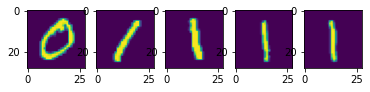

In [4]:
X_train=data_train1.drop('label',axis=1)
X_train = X_train /255
Y_train=data_train1['label']

X_test=data_test1.drop('label',axis=1)
X_test = X_test /255
Y_test=data_test1['label']

X_train1=X_train.to_numpy()
X_train1=np.resize(X_train,(len(X_train),28,28))

X_test1=X_test.to_numpy()
X_test1=np.resize(X_test,(len(X_test),28,28))

Y_test1=Y_test.to_numpy()

images=5
fig, ax = plt.subplots(nrows=1, ncols=images)
for i in range(images):
    ax[i].imshow(X_train1[i])
plt.show()

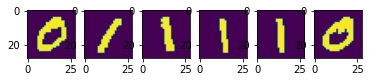

In [5]:
#переводим пиксели, которые закрашены хоть как-то, в закрашены полностью
X_train1=X_train1.astype(bool).astype(int)
X_test1=X_test1.astype(bool).astype(int)
Y_test1=Y_test1.astype(bool).astype(int)

images=6
fig, ax = plt.subplots(nrows=1, ncols=images)
for i in range(images):
    ax[i].imshow(X_train1[i])
plt.show()

In [6]:
class EMAlgorithm(object):
    
    def __init__(self, iterations=10):     
        self.iterations = iterations
        
    def bern_distr(self, x_train, params):
        '''
        Return Bernoulli Distribution of x with parametres from params for each row
        >>> EM = EMAlgorithm()
        >>> EM.bern_distr(x_train=np.array([[0,0],[0,1]]), params=np.array([0.5, 1]))
        array([[0.25, 0.  ],
               [0.25, 0.  ]])
        '''
        params = np.repeat(np.expand_dims(params, axis=0), repeats=x_train.shape[0], axis=0)
        params = params.reshape((params.shape[0], params.shape[1], -1))
        x_train = np.repeat(np.expand_dims(x_train, axis=1), repeats=2, axis=1)
        x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], -1))
        return np.multiply(np.power(params, x_train).prod(axis=-1), np.power(1 - params, (1-x_train)).prod(axis=-1))
    def ptk(self,aposterior_probs):
        """
        Return average for each column
        >>> EM = EMAlgorithm()
        >>> EM.ptk(np.array([[0,1],[0.5,0],[0.5,0],[1,1]]))
        array([0.5, 0.5])
        >>> EM.ptk(np.array([[0.,0.]]))
        array([0., 0.])
        """
        return aposterior_probs.mean(axis=0)

    def __ptxk(self, x,ptkx):
        #Сумма pt(k|x) по всем X
        summa = np.sum(ptkx,axis=0) 
        ptx_k = np.zeros((2, x.shape[1], x.shape[2]))

        #Сумма xi * pt(k|x)
        for i in range(ptkx.shape[0]-1):
            ptx_k[0] += x[i]*ptkx[i][0]
            ptx_k[1] += x[i]*ptkx[i][1]

        #Сумма xi * pt(k|x) / Сумма pt(k|x)
        ptx_k[0]=ptx_k[0]/summa[0]
        ptx_k[1]=ptx_k[1]/summa[1]

        return ptx_k

    def __ptkx(self, conditions, apr_prob):
        summa = conditions[:, 0] * apr_prob[0] + conditions[:, 1] * apr_prob[1]
        apost_0 = (conditions[:, 0] * apr_prob[0]) / summa
        apost_1 = (conditions[:, 1] * apr_prob[1]) / summa
        return np.stack((apost_0, apost_1), axis=1)

    def p0(self, n):
        x = np.random.random((n, 1))
        return np.concatenate((x, 1-x),axis=1)

    def fit(self, X_train, X_test, Y_test):
        
        pkx = self.p0(X_train.shape[0])
        
        for iteration in range(self.iterations):
            
            pk=self.ptk(pkx)
            pxk = self.__ptxk(X_train, pkx)
            pkx = self.__ptkx(self.bern_distr(X_train,pxk), pk)
            
            
            prediction = self.bern_distr(X_test, pxk).argmax(axis=1)
            print('Iter {} Accuracy : \n'.format(iteration),accuracy_score(prediction,Y_test))
                
            #print('error: \n' , accuracy_score(prediction,Y_test))
            #if error < 0:
            #    error = ((1 - prediction) - Y_test).sum() / len((prediction))
            #print('ITERATION №',(iteration+1))
            #print("Error: ", error)
            
            fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2)
            ax1.imshow(pxk[0])
            ax2.imshow(pxk[1])
            #plt.show()
        doctest.testmod()
    

Iter 0 Accuracy : 
 0.395499407816818
Iter 1 Accuracy : 
 0.17994472956968022
Iter 2 Accuracy : 
 0.00852743782076589
Iter 3 Accuracy : 
 0.006553493880773786
Iter 4 Accuracy : 
 0.006790367153572839
Iter 5 Accuracy : 
 0.006711409395973154
Iter 6 Accuracy : 
 0.006711409395973154
Iter 7 Accuracy : 
 0.006711409395973154
Iter 8 Accuracy : 
 0.006711409395973154


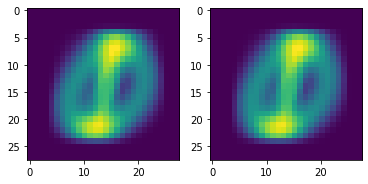

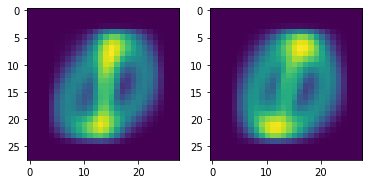

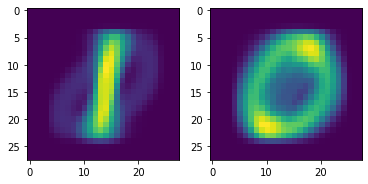

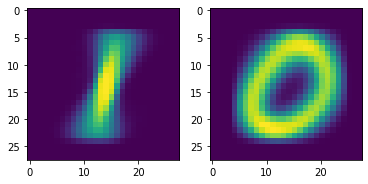

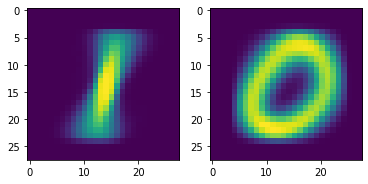

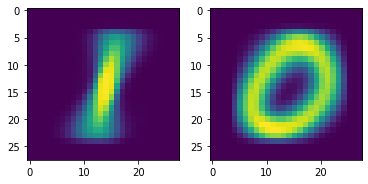

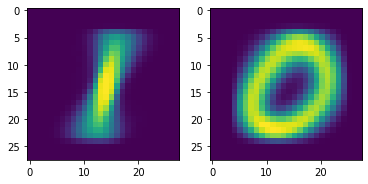

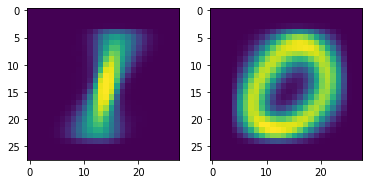

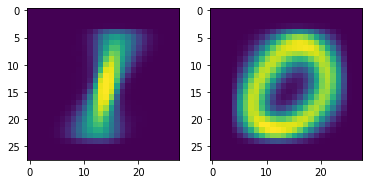

In [7]:
EM = EMAlgorithm(iterations = 9)
EM.fit(X_train1, X_test1, Y_test1)